In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', None)

# Suppress Deprecation and Incorrect Usage Warnings
import warnings
warnings.filterwarnings('ignore')

In [35]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [9]:
wine_quality = pd.read_csv("data/winequality-red.csv", sep=";")
wine_quality.rename(columns=lambda x: x.replace(" ", "_"), inplace=True)

print(wine_quality.shape)
wine_quality.head()

(1599, 12)


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [26]:
x_train, x_test, y_train, y_test = train_test_split(wine_quality['alcohol'], wine_quality["quality"], train_size=0.7, random_state=42)
# x_train = pd.DataFrame(x_train)
# x_test = pd.DataFrame(x_test)
# y_train = pd.DataFrame(y_train)
# y_test = pd.DataFrame(y_test)

In [27]:
x_train.head()

925     11.0
363     10.2
906     11.0
426     11.4
1251     9.8
Name: alcohol, dtype: float64

In [28]:
y_train.head()

925     7
363     5
906     5
426     6
1251    5
Name: quality, dtype: int64

In [29]:
def mean(values):
    return round(sum(values)/float(len(values)),2)

alcohol_mean = mean(x_train)
quality_mean = mean(y_train)

print(alcohol_mean, quality_mean)

10.42 5.62


In [31]:
alcohol_variance = round(sum((x_train - alcohol_mean) **2),2)
quality_variance = round(sum((y_train - quality_mean) **2),2)
covariance = round(sum((x_train - alcohol_mean) * (y_train - quality_mean)), 2)
b1 = covariance/alcohol_variance
b0 = quality_mean - b1*alcohol_mean

print("\n\nIntercept (B0):", round(b0,4), "Co-efficient (B1):", round(b1,4))



Intercept (B0): 1.6918 Co-efficient (B1): 0.377


In [34]:
y_pred = b0+b1*x_test
R_sqrd = 1 - (sum((y_test - y_pred)**2) / sum((y_test - mean(y_test))**2))
print("Test R-squared value", round(R_sqrd,4))

Test R-squared value 0.185


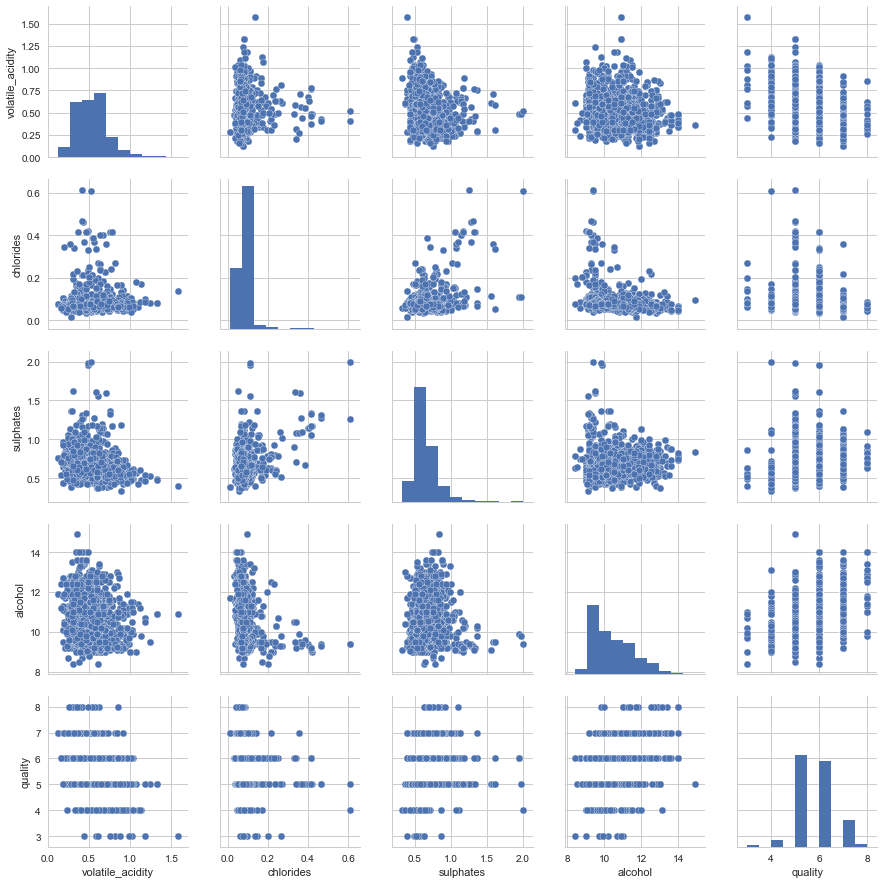

In [38]:
eda_columns = ['volatile_acidity', 'chlorides', 'sulphates', 'alcohol', 'quality']
sns.set(style='whitegrid', context='notebook')
sns.pairplot(wine_quality[eda_columns], size=2.5, x_vars=eda_columns, y_vars = eda_columns)
plt.show()

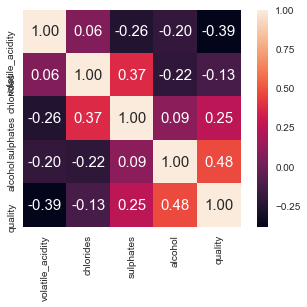

In [39]:
corr_mat = np.corrcoef(wine_quality[eda_columns].values.T)
sns.set(font_scale=1)
full_mat = sns.heatmap(corr_mat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=eda_columns, xticklabels=eda_columns)
plt.show()

In [40]:
wine_quality.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [47]:
def ols_vif(columns):
    pdx = wine_quality[columns]
    pdy = wine_quality['quality']

    x_train, x_test, y_train, y_test = train_test_split(pdx, pdy, train_size=0.7, random_state=42)

    x_train_new = sm.add_constant(x_train)
    x_test_new = sm.add_constant(x_test)
    full_mod = sm.OLS(y_train, x_train_new)

    full_res = full_mod.fit()
    print(full_res.summary())
    
    cnames = x_train.columns
    for i in np.arange(0, len(cnames)):
        xvars = list(cnames)
        yvar = xvars.pop(i)
        mod = sm.OLS(x_train[yvar], sm.add_constant(x_train_new[xvars]))
        res = mod.fit()
        vif = 1/(1-res.rsquared)
        print(yvar, round(vif))

In [56]:
all_columns = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']
ols_vif(columns)

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     89.21
Date:                Mon, 02 Apr 2018   Prob (F-statistic):          4.31e-103
Time:                        20:05:34   Log-Likelihood:                -1104.7
No. Observations:                1119   AIC:                             2225.
Df Residuals:                    1111   BIC:                             2266.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.9210 

In [48]:
columns = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']
ols_vif(columns)

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     62.62
Date:                Mon, 02 Apr 2018   Prob (F-statistic):          1.12e-100
Time:                        19:59:20   Log-Likelihood:                -1103.6
No. Observations:                1119   AIC:                             2229.
Df Residuals:                    1108   BIC:                             2284.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.3324 

In [49]:
columns = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'pH', 'sulphates', 'alcohol']
ols_vif(columns)

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     69.62
Date:                Mon, 02 Apr 2018   Prob (F-statistic):          1.40e-101
Time:                        19:59:41   Log-Likelihood:                -1103.6
No. Observations:                1119   AIC:                             2227.
Df Residuals:                    1109   BIC:                             2277.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.0110 

In [50]:
columns = ['volatile_acidity', 'citric_acid', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'pH', 'sulphates', 'alcohol']
ols_vif(columns)

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     78.33
Date:                Mon, 02 Apr 2018   Prob (F-statistic):          1.77e-102
Time:                        20:00:05   Log-Likelihood:                -1103.8
No. Observations:                1119   AIC:                             2226.
Df Residuals:                    1110   BIC:                             2271.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.2723 

In [51]:
columns = ['volatile_acidity', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'pH', 'sulphates', 'alcohol']
ols_vif(columns)

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     89.21
Date:                Mon, 02 Apr 2018   Prob (F-statistic):          4.31e-103
Time:                        20:00:18   Log-Likelihood:                -1104.7
No. Observations:                1119   AIC:                             2225.
Df Residuals:                    1111   BIC:                             2266.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.9210 

In [52]:
pdx = wine_quality[columns]
pdy = wine_quality['quality']

x_train, x_test, y_train, y_test = train_test_split(pdx, pdy, train_size=0.7, random_state=42)

x_train_new = sm.add_constant(x_train)
x_test_new = sm.add_constant(x_test)
full_mod = sm.OLS(y_train, x_train_new)

full_res = full_mod.fit()
print(full_res.summary())

cnames = x_train.columns
for i in np.arange(0, len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train[yvar], sm.add_constant(x_train_new[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print(yvar, round(vif))

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     89.21
Date:                Mon, 02 Apr 2018   Prob (F-statistic):          4.31e-103
Time:                        20:01:59   Log-Likelihood:                -1104.7
No. Observations:                1119   AIC:                             2225.
Df Residuals:                    1111   BIC:                             2266.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.9210 

In [55]:
y_pred = full_res.predict(x_test_new)
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.columns = ['y_pred']

pred_data = pd.DataFrame(y_pred_df['y_pred'])
y_test_new = pd.DataFrame(y_test)
y_test_new.reset_index(inplace=True)
pred_data['y_test'] = pd.DataFrame(y_test_new['quality'])

rsqd = r2_score(y_test_new['quality'].tolist(), y_pred_df['y_pred'].tolist())
round(rsqd,4)

0.35189999999999999

# Ridge

In [58]:
from sklearn.linear_model import Ridge

pdx = wine_quality[all_columns]
pdy = wine_quality['quality']

x_train, x_test, y_train, y_test = train_test_split(pdx, pdy, train_size=0.7, random_state=42)

alphas = [1e-4, 1e-3, 1e-2, 0.1, 0.5, 1.0, 5.0, 10.0]
initrsq = 0

for alph in alphas:
    ridge_reg = Ridge(alpha=alph)
    ridge_reg.fit(x_train, y_train)
    tr_rsqrd = ridge_reg.score(x_train, y_train)
    ts_rsqrd = ridge_reg.score(x_test, y_test)
    
    if ts_rsqrd > initrsq:
        print("Lambda:", alph, "Train R-Squared value:", round(tr_rsqrd,5), "Test R-squared value", round(ts_rsqrd,5))
        initrsq = ts_rsqrd

Lambda: 0.0001 Train R-Squared value: 0.3612 Test R-squared value 0.35135


# Lasso

In [59]:
from sklearn.linear_model import Lasso

initrsq = 0

for alph in alphas:
    lasso_reg = Lasso(alpha=alph)
    lasso_reg.fit(x_train, y_train)
    tr_rsqrd = lasso_reg.score(x_train, y_train)
    ts_rsqrd = lasso_reg.score(x_test, y_test)
    
    if ts_rsqrd > initrsq:
        print("Lambda:", alph, "Train R-Squared value:", round(tr_rsqrd,5), "Test R-squared value", round(ts_rsqrd,5))
        initrsq = ts_rsqrd

Lambda: 0.0001 Train R-Squared value: 0.36101 Test R-squared value 0.35057
